In [6]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from statistics import mean

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1920, 1141, 3)


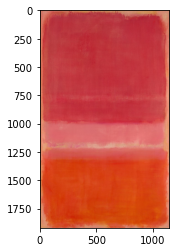

In [115]:
image = cv2.imread('rothkored.jpg') #image in BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #conversion
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

C:\Users\potat\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


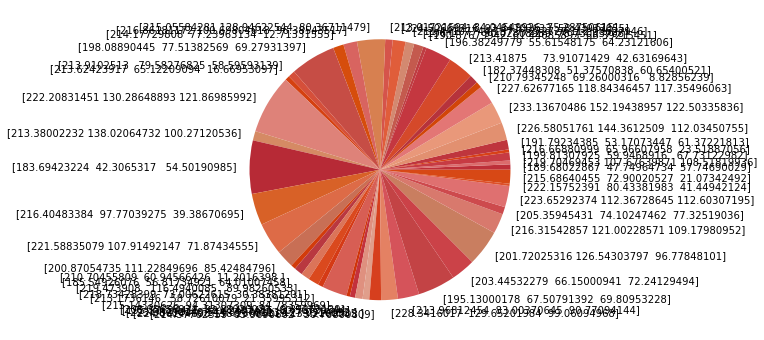

In [118]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    
    

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    colorsrgb = []
    for i in ordered_colors:
        colorsrgb.append(i)
    #for i in counts.keys():
        #for j in ordered_colors:
            #print(j)

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = rgb_colors, colors = hex_colors)

    return colorsrgb 

def get_counts(image, number_of_colors):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels) #cluster no. as key, size as value
    
    return counts

colors = get_colors(get_image('rothkored.jpg'), 50, True)
counts = get_counts(get_image('rothkored.jpg'), 50)

    

In [119]:
#color temperature depends on the value of r and b(more b -> cool, more r -> warm)
#larger set of colours-> more discepency in colour range
#e.g. cool work, use few colours and one patch of red, cause the entire average to be put down

#creating numpy array to contain the cluster size in order
values = np.array([])

for value in counts.values():
    values = np.append(values,value)
    

'''
keys = np.array([])

for key in counts.keys():
    keys = np.append(keys,key)
'''

#print(values)
#print(values.sum())
#print(keys)
listR = np.array([])


totalR = 0
for i in range(len(colors)):
    totalR += colors[i][0]
    listR = np.append(listR,colors[i][0])

listB = np.array([])
totalB = 0
for i in range(len(colors)):
    totalB += colors[i][2]
    listB = np.append(listB,colors[i][2])

#calculation of percentage, cluster size/total size*colour value
#better than mean as mean does not take into consideration the portionality of the colours
fullR = np.array([])
for i in range(len(values)):
    fullR = np.append(fullR, values[i]/values.sum()*colors[i][0])
    
fullB = np.array([])
for i in range(len(values)):
    fullB = np.append(fullB, values[i]/values.sum()*colors[i][2])
    
print(fullR.sum())
print(fullB.sum())
meanB = listB.mean()
meanR = listR.mean()
    
    

#print(colors)
#print(meanR)
#print(meanB)
#print(listR)
#print(listB)

if fullB.sum() > fullR.sum():
    print('The color temperature is cool.')
else:
    print('The color temperature is warm.')

    


210.3064290465244
67.00941779296663
The color temperature is warm.


0.0815103711939622
The work is monochromatic.


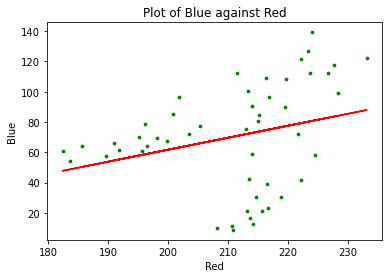

In [121]:
#linear regression to find vibrancy
plt.scatter(listR, listB, label="point", color="green",
            marker=".", s=30)

denominator = listR.dot(listR) - listR.mean() * listR.sum()
m = (listR.dot(listB)-listB.mean()*listR.sum())/denominator
b = (listB.mean()* listR.dot(listR)-listR.mean()*listR.dot(listB))/denominator

y_pred = m*listR + b

plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Plot of Blue against Red')
plt.plot(listR,y_pred,'r')

#using co-efficient of determination, R-squared
res = listB - y_pred
tot = listB - listB.mean()
r_sq = 1- res.dot(res)/tot.dot(tot)
print(r_sq)

if r_sq < 0.05:
    print('The work is vibrant.')
else:
    print('The work is monochromatic.')
    